In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
class ReLU:
    """ReLU activation function.

    Applies the rectified linear unit function element-wise. ReLU returns 0 if x < 0,
    and raw x otherwise.
    """

    def forward(self, x):
        self.x = x
        return np.maximum(x, 0)

    def backward(self, grad_output):
        return grad_output * (self.x >= 0).astype(np.float32)


def mse_loss(y_pred, y):
    return np.mean(np.square(y_pred - y))


def mse_loss_deriv(y_pred, y):
    return 2 * (y_pred - y) / y.shape[0]


class Linear:
    """Linear layer implementation.

    This implements a simple linear layer with weight and bias parameters. It supports
    forward and backward passes for training with gradient descent.

    Attributes:
        lr (float): Learning rate for gradient descent
        W (np.array): Weights matrix
        b (np.array): Bias vector
        input (np.array): Input to the layer for the latest forward pass

    """

    def __init__(self, n_input, n_output, lr):
        self.lr = lr
        self.W = np.random.rand(n_input, n_output) - 0.5
        self.b = np.random.rand(1, n_output) - 0.5
        self.input = None

    def forward(self, x):
        self.input = x
        return x @ self.W + self.b

    def _update_weights(self, grad_W, grad_b):
        self.W -= self.lr * grad_W
        self.b -= self.lr * grad_b

    def backward(self, grad_output):
        grad_input = grad_output @ self.W.T
        grad_W = 1 / self.input.shape[0] * self.input.T @ grad_output
        grad_b = 1 / self.input.shape[0] * np.sum(grad_output, axis=0, keepdims=True)

        self._update_weights(grad_W, grad_b)

        return grad_input

    def fit(self, X, y, n_epochs, batch_size=10):
        """Trains the linear layer using mini-batch gradient descent.

        Args:
            X (np.array): Input data
            y (np.array): Target labels
            n_epochs (int): Number of training epochs
            batch_size (int): Size of each mini-batch
        """
        n_samples = X.shape[0]
        for epoch in range(n_epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            x_train = X[indices]
            y_train = y[indices]

            for i in range(0, n_samples, batch_size):
                x_batch = x_train[i : i + batch_size]
                y_batch = y_train[i : i + batch_size]

                y_pred = self.forward(x_batch)
                loss_derivate = mse_loss_deriv(y_pred, y_batch)

                self.backward(loss_derivate)

            y_pred = self.forward(X)
            loss = mse_loss(y_pred, y)

            if epoch % 5 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward(X)


class MLP:
    """MLP class for building and training a multilayer perceptron neural network.

    A multilayer perceptron (MLP) is a type of feedforward artificial neural network that
    generates a set of outputs from a set of inputs. It consists of multiple layers of nodes,
    with each layer fully connected to the next layer.

    Example usage:

    ```
    mlp = MLP(n_input=28*28, n_output=10, n_hidden=128, n_layers=3, lr=0.01)
    mlp.fit(X_train, y_train, n_epochs=10)
    y_pred = mlp.predict(X_test)
    ```

    Parameters:
        n_input (int): Number of input features
        n_output (int): Number of output values
        n_hidden (int): Number of hidden units
        n_layers (int): Number of hidden layers
        lr (float): Learning rate for gradient descent

    """

    def __init__(self, n_input, n_output, n_hidden, n_layers, lr):
        self.n_input = n_input
        self.n_output = n_output
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.lr = lr
        self.layers = []
        if n_layers == 1:
            self.layers.append(Linear(n_input, n_output, lr))
        else:
            for i in range(n_layers):
                if i == 0:
                    self.layers.append(Linear(n_input, n_hidden, lr))
                    self.layers.append(ReLU())
                elif i == n_layers - 1:
                    self.layers.append(Linear(n_hidden, n_output, lr))
                else:
                    self.layers.append(Linear(n_hidden, n_hidden, lr))
                    self.layers.append(ReLU())

    def forward(self, x):
        predict = x.copy()
        for layer in self.layers:
            predict = layer.forward(predict)
        return predict

    def backward(self, grad_output):
        for i, layer in enumerate(reversed(self.layers)):
            grad_output = layer.backward(grad_output)

    def fit(self, X, y, n_epochs, batch_size=10):
        """Train the network.

        Parameters:
            X (ndarray): Input data
            y (ndarray): Target values
            n_epochs (int): Number of training epochs
            batch_size (int): Batch size for mini-batch training
        """
        n_samples = X.shape[0]
        for epoch in range(n_epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            x_train = X[indices]
            y_train = y[indices]

            losses = []
            for i in range(0, n_samples, batch_size):
                x_batch = x_train[i : i + batch_size]
                y_batch = y_train[i : i + batch_size]

                y_pred = self.forward(x_batch)
                loss = mse_loss(y_pred, y_batch)
                losses.append(loss)

                loss_derive = mse_loss_deriv(y_pred, y_batch)

                self.backward(loss_derive)

            loss = np.mean(losses)
            if epoch % 5 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward(X)

### Обучим модель линейной регрессии
Построим линейную зависимость в данных

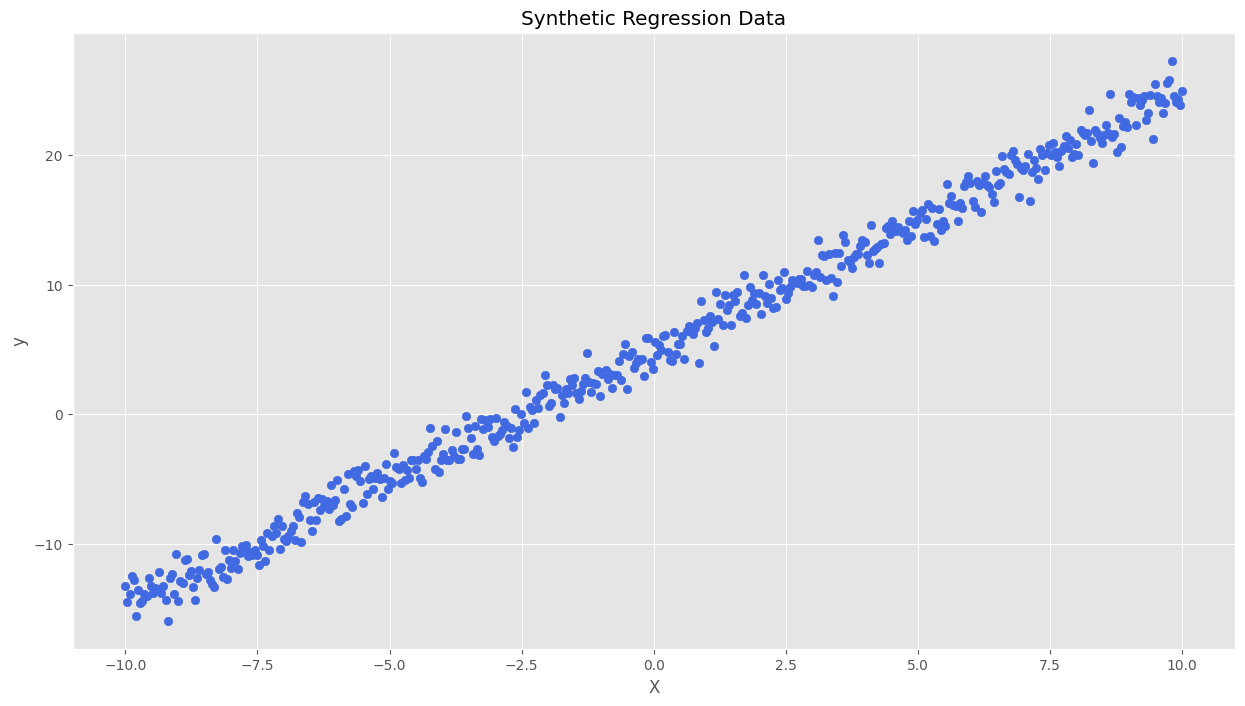

In [3]:
np.random.seed(0)

num_samples = 500
X = np.linspace(-10, 10, num_samples).reshape(-1, 1)
noise = np.random.normal(0, 1, size=(num_samples, 1))
y = 2 * X + 5 + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Visualize the data
plt.figure(figsize=(15, 8))
plt.scatter(X, y, color="royalblue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.show()

Epoch 0, Loss: 19.2963
Epoch 5, Loss: 9.2479
Epoch 10, Loss: 4.6498
Epoch 15, Loss: 2.6514
MSE loss on test set: 1.606433682528834


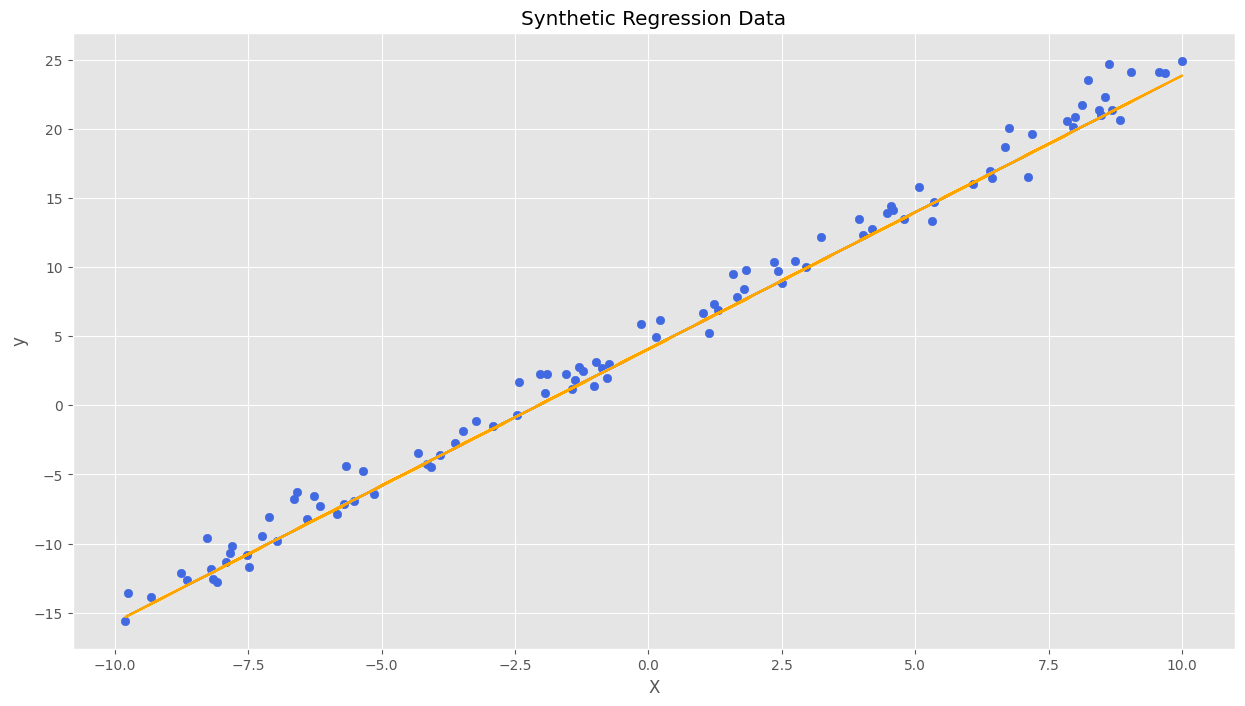

In [4]:
linear = Linear(n_input=X_train.shape[1], n_output=1, lr=0.01)
linear.fit(X_train, y_train, n_epochs=20)
y_pred = linear.predict(X_test)

print(f"MSE loss on test set: {mse_loss(y_test, y_pred)}")

plt.figure(figsize=(15, 8))
plt.scatter(X_test, y_test, color="royalblue")
plt.plot(X_test, y_pred, color="orange")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.show()

In [5]:
linear.W, linear.b

(array([[1.97791294]]), array([[4.07579654]]))

Построим данные с квадратичной зависимостью

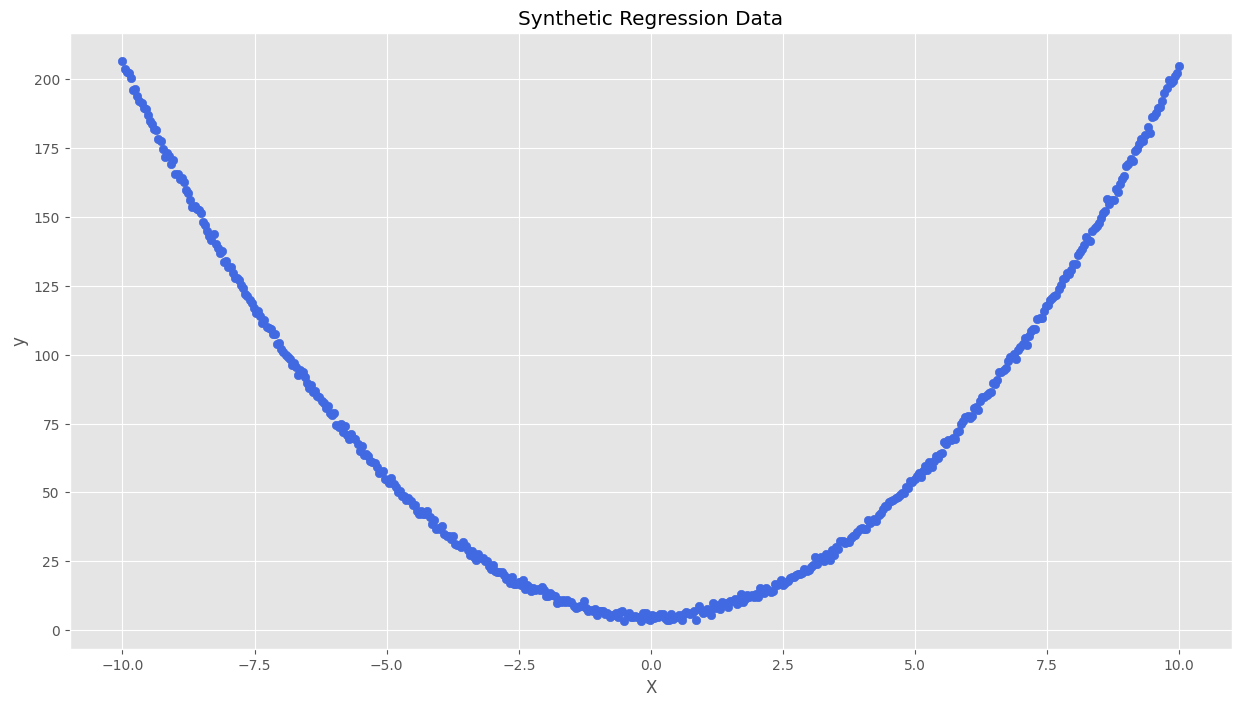

In [6]:
np.random.seed(0)

num_samples = 500
X = np.linspace(-10, 10, num_samples).reshape(-1, 1)
noise = np.random.normal(0, 1, size=(num_samples, 1))
y = 2 * X**2 + 5 + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Visualize the data
plt.figure(figsize=(15, 8))
plt.scatter(X, y, color="royalblue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.show()

Epoch 0, Loss: 8032.8957
Epoch 5, Loss: 5698.3633
Epoch 10, Loss: 4490.2766
Epoch 15, Loss: 4023.0721
MSE loss on test set: 3819.8419705813535


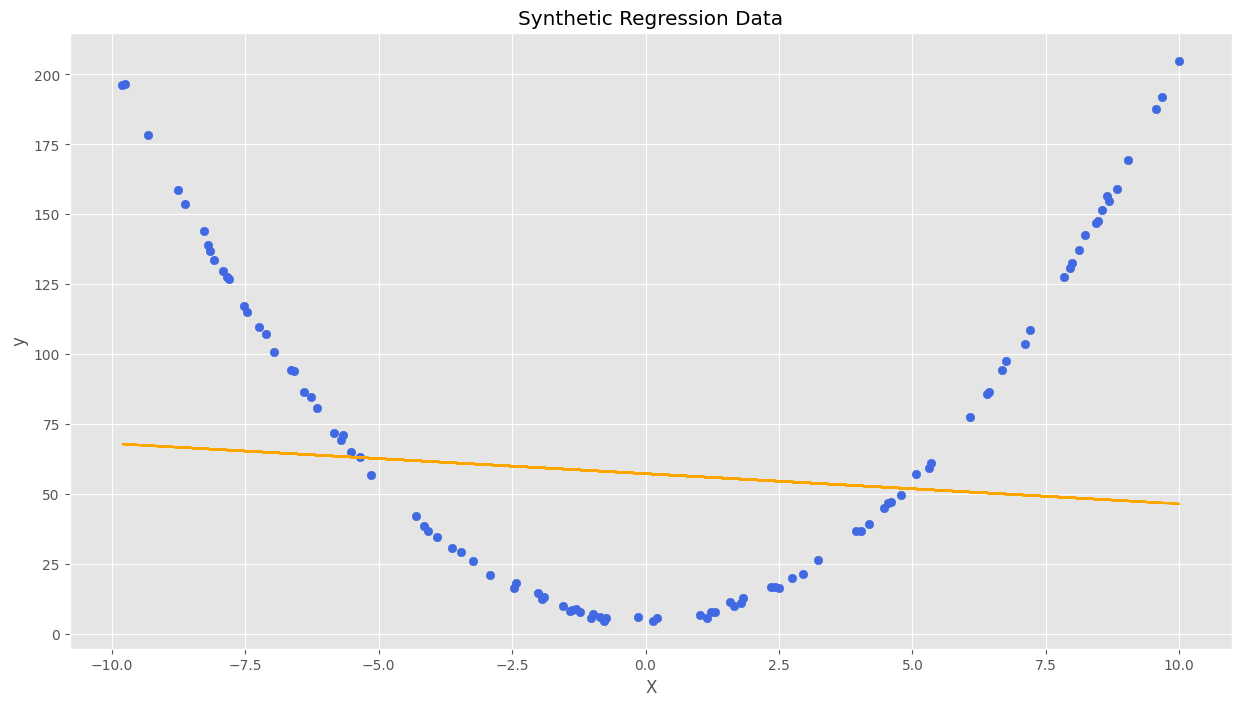

In [7]:
linear = Linear(n_input=X_train.shape[1], n_output=1, lr=0.01)
linear.fit(X_train, y_train, n_epochs=20)
y_pred = linear.predict(X_test)

print(f"MSE loss on test set: {mse_loss(y_test, y_pred)}")

plt.figure(figsize=(15, 8))
plt.scatter(X_test, y_test, color="royalblue")
plt.plot(X_test, y_pred, color="orange")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.show()

Как мы видим модель линейной регессии не справляется с квадратичной зависимостью без добавления дополнительных признаков

### Обучим многослойный перцептрон

Epoch 0, Loss: 5326.1959
Epoch 5, Loss: 388.2182
Epoch 10, Loss: 274.3854
Epoch 15, Loss: 162.4452
Epoch 20, Loss: 117.9984
Epoch 25, Loss: 91.9656
Epoch 30, Loss: 70.7116
Epoch 35, Loss: 73.6350
Epoch 40, Loss: 63.8300
Epoch 45, Loss: 65.4756
Epoch 50, Loss: 55.8925
Epoch 55, Loss: 57.3897
MSE loss on test set: 44.482925591434395


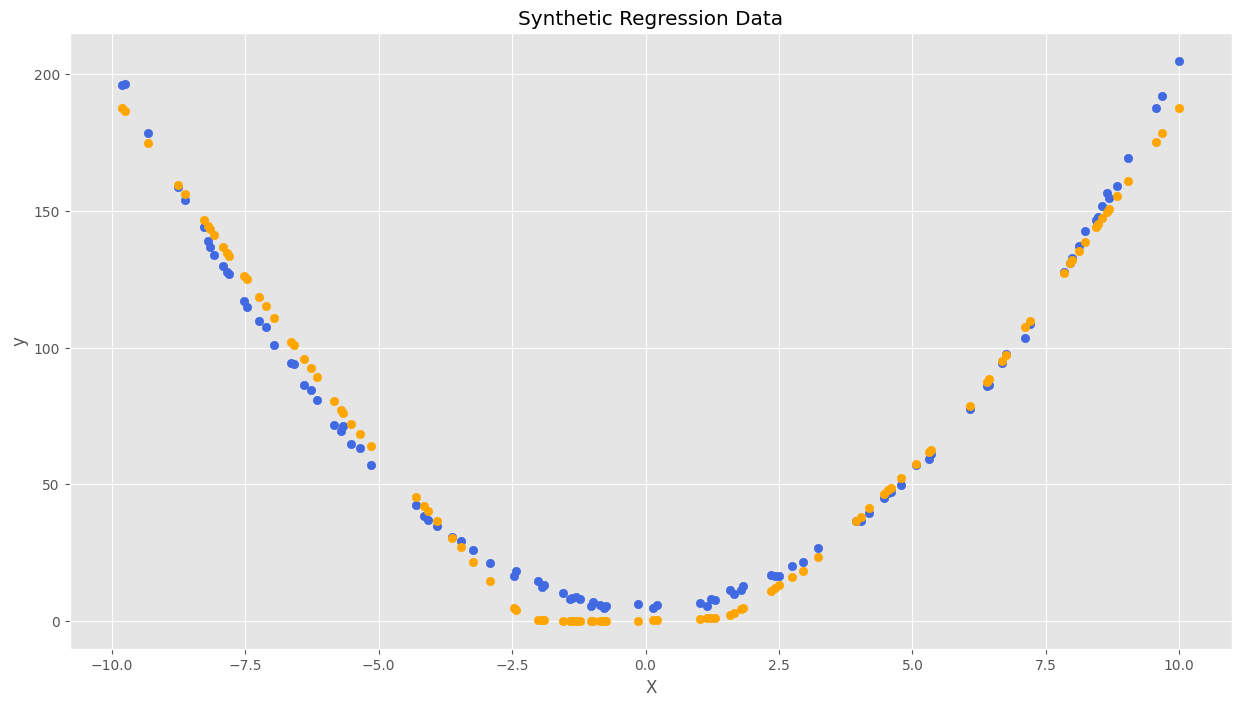

In [8]:
mlp = MLP(n_input=X_train.shape[1], n_output=1, n_hidden=10, n_layers=3, lr=0.001)
mlp.fit(X_train, y_train, n_epochs=60)
y_pred = mlp.predict(X_test)

print(f"MSE loss on test set: {mse_loss(y_test, y_pred)}")

plt.figure(figsize=(15, 8))
plt.scatter(X_test, y_test, color="royalblue")
plt.scatter(X_test, y_pred, color="orange")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Data")
plt.show()

Как мы видим, добавление скрытых слоев и нелинейных фукнций активации позволяет восстановить нелинейную зависимость

Обучим нейронную сеть на нескольких признаках

In [9]:
X, y = make_regression(n_samples=100_000, n_features=10, noise=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

mlp = MLP(n_input=X_train.shape[1], n_output=1, n_hidden=10, n_layers=3, lr=0.001)
mlp.fit(X_train, y_train, n_epochs=30)
y_pred = mlp.predict(X_test)
print(f"MSE loss on test set: {mse_loss(y_test, y_pred)}")

Epoch 0, Loss: 578.4753
Epoch 5, Loss: 1.2622
Epoch 10, Loss: 1.2474
Epoch 15, Loss: 1.2394
Epoch 20, Loss: 1.2407
Epoch 25, Loss: 1.2308
MSE loss on test set: 1.2461345838399043
